# TP 2 - Séance 1
## Rehaussement d'image

Équipe #14

- Ippersiel, Marie-Ève (2009518)
- Song, Shu Ai (2025639)

In [1]:
# Importe les modules qui seront utilisés dans le laboratoire.
import numpy as np
# from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 10)
from scipy.ndimage import convolve

# Exercice I: Prétraitement de radiographies
Le but de cet exercice est d'implémenter un traitement de réhaussement des contrastes et des contours pour des radiographies du thorax.

## Égalisation d'Histogramme

**Remarques**:
- Les intensités des images sont généralement stockées sous la forme de valeur entière comprise entre 0 et 255 (un octet par canal et par pixel) et sont convertis automatiquement en valeurs flottantes comprises entre 0 et 1 par ```imread()```. Cependant pour calculer et manipuler l'histogramme d'une image, on doit manipuler les intensités sous leur forme originale "entière".  
  Vous pourrez convertir en valeurs entières une image qui a été chargée en valeurs flottantes avec:  
  ```img = (imread('radio_thoracique.png')*255).astype(np.uint8)```.


- Par défaut lorsque vous affichez une image avec ```imshow(img, cmap='gray')```, les intensités affichées sont modifiés pour maximiser les contrastes (l'intensité minimale correspondra à la couleur noir, l'intensité maximale à la couleur blanche). Pour forcer l'affichage à conserver les intensités originales il faut lui en spécifier les bornes: ```imshow(img, cmap='gray', vmin=0, vmax=255)```   
  (ou dans le cas flottant: ```imshow(img, cmap='gray', vmin=0, vmax=1)```).

**Q1.** Ouvrez, convertissez en valeurs entières et affichez l'image ```radio_thoracique.png```.   
(Prenez soin de spécifier les bornes des intensités lors de l'affichage.)

Text(0.5, 1.0, 'radio_thoracique.png')

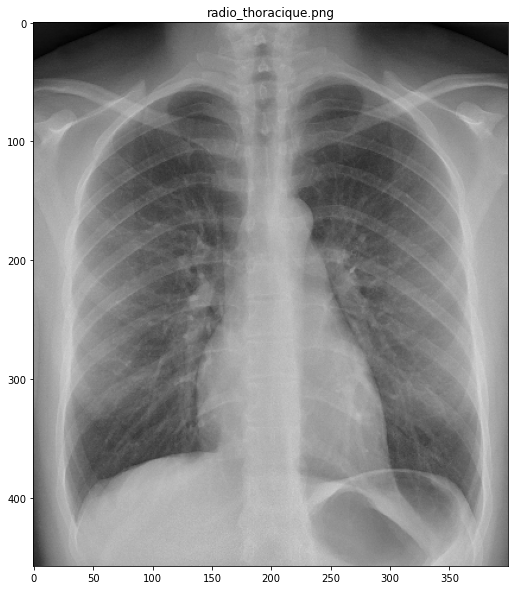

In [2]:
img_radio_thorax = (plt.imread('radio_thoracique.png')*255).astype(np.uint8)

plt.imshow(img_radio_thorax, cmap='gray', vmin=0, vmax=255)
plt.title('radio_thoracique.png')


**2.** À l'aide de [np.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html), calculez puis affichez son histogramme. Pour gagner du temps aux questions suivantes, vous pouvez définir une méthode qui effectue ces deux opérations.

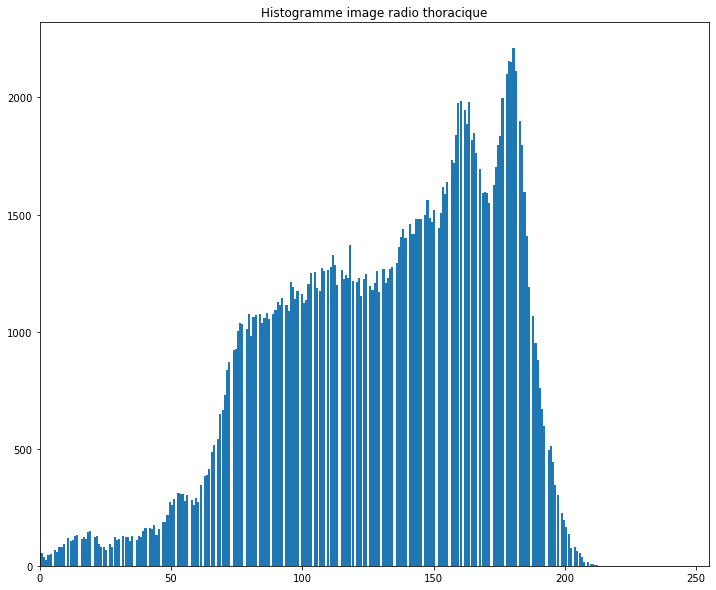

In [26]:
def histogramme(image, titre_string, affichage_bool):
    hist, bin_edges = np.histogram(image, bins=255)
    
    if affichage_bool == True:
        plt.figure()
        plt.bar(bin_edges[:-1], hist) 
        plt.xlim(0, 255)  
        plt.title(titre_string)
        plt.show()     
    
    return hist, bin_edges

hist_radio_thorax, bin_edges_radio_thorax = histogramme(img_radio_thorax,
                                                        'Histogramme image radio thoracique',
                                                        True)


**3a.** Complétez la fonction ```equalize_histogram(img)``` qui effectue l'égalisation d'histogramme d'une image et renvoie l'image égalisée.

In [28]:
def equalize_histogram(img):
    # Astuces: 
    #  - pour transformer l'intensité de chaque pixel d'une image I selon un mapping T 
    #    (c'est-à-dire pour calculer Ieq[i,j] = T[I[i,j]] pour tous les i et j), pas besoin de boucle:
    #    il suffit de faire: Ieq = T[I]
    #  - pour calculer la somme cumulée d'un vecteur V, utilisez np.cumsum(V)
    
    hist, bin_edges = histogramme(img, '', False)
    hist_cum = np.cumsum(hist)
    
    numerateur = (hist_cum - hist_cum.min())
    denominateur = hist_cum.max() - hist_cum.min()
    
    T = (numerateur/denominateur)*255 # Car valeurs d'intensités vont de 0 à 255
                
    img_eq = T[img]
   
    return img_eq


**3b.** Calculez et affichez l'image égalisée et son histogramme. Que constatez vous? Quel impact a l'égalisation sur le contraste de l'image?

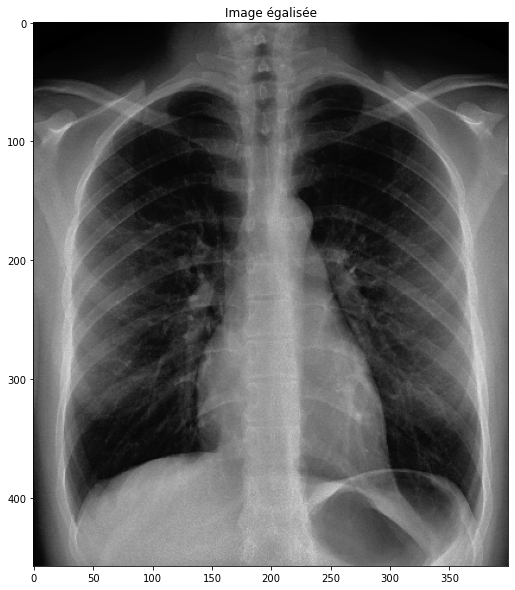

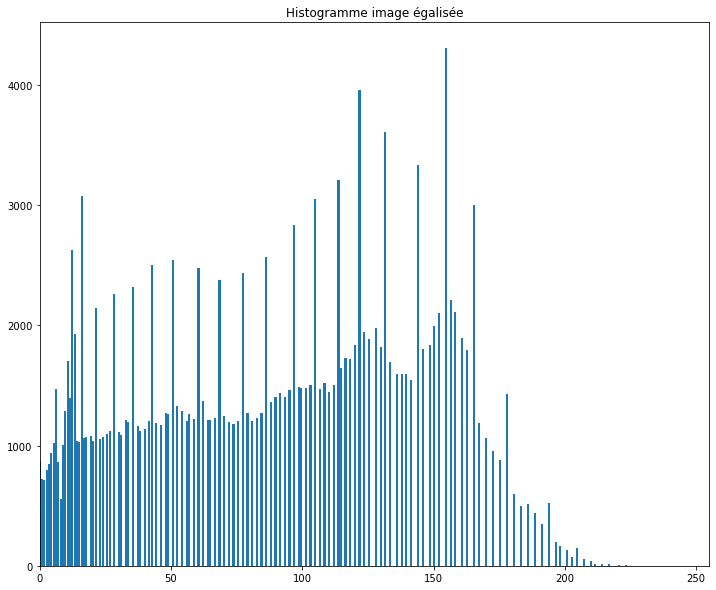

In [29]:
img_eq = equalize_histogram(img_radio_thorax)
plt.figure()
plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
plt.title('Image égalisée')
hist_eq, bin_edges_eq = histogramme(img_eq, 'Histogramme image égalisée', True)


Réponse : On constate que le contraste est amélioré. On distingue davantage les os (intensité devenue plus forte) par rapport au fond (intensité devenue plus faible). 

## Filtrage High-Boost
Les traitements présentés dans les questions suivantes seront tous appliqué sur la radiographie après égalisation de son histogramme. Pour simplifier l'implémentation des traitements ils seront aussi réalisés sur l'image convertie en intensités flottantes.

En supposant que l'image égalisée soit stockées dans ```img_egalisee```, la conversion d'intensités entières en intensités flottantes est réalisée par la cellule ci-dessous.

In [30]:
img_egalisee = img_eq.astype(np.float64) / 255   

**4.** En utilisant la fonction [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html) (de scipy.ndimage), calculez la convolution de l'image égalisée avec une gaussienne de taille 3x3: 

$$ W_\text{Gaussienne3}\ =\ \dfrac{1}{16}\ \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix} $$

Affichez côte à côte l'image égalisée et le résultat de la convolution.

_(N'oubliez pas d'indiquer les bornes des intensités: 0 et 1. N'hésitez pas à augmenter la taille de la figure pour mieux observer les images.)_

Text(0.5, 1.0, 'Image égalisée convoluée avec gaussienne 3x3')

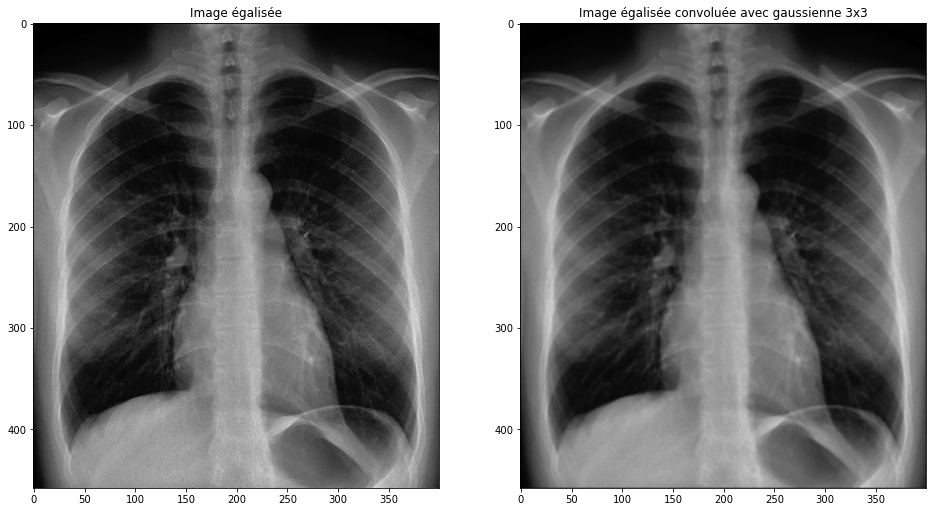

In [10]:
Wgaussienne_3 = 1/16*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

img_convol = convolve(img_egalisee, Wgaussienne_3, mode='constant', cval=0.0)

plt.figure(figsize=(16,12))

plt.subplot(1,2,1)
plt.imshow(img_egalisee, cmap='gray', vmin=0, vmax=1)
plt.title('Image égalisée')

plt.subplot(1,2,2)
plt.imshow(img_convol, cmap='gray', vmin=0, vmax=1)
plt.title('Image égalisée convoluée avec gaussienne 3x3')


**5a.** Effectuez la même opération (convolution et affichage) avec une gaussienne de taille 7x7: 

$W_\text{Gaussienne7}\ =\ \dfrac{1}{1115}\ 
\begin{bmatrix} 
 1 &  4 &  7 & 10 &  7 &  4 &  1 \\
 4 & 12 & 26 & 33 & 26 & 12 &  4 \\
 7 & 26 & 55 & 71 & 55 & 26 &  7 \\
10 & 33 & 71 & 91 & 71 & 33 & 10 \\
 7 & 26 & 55 & 71 & 55 & 26 &  7 \\
 4 & 12 & 26 & 33 & 26 & 12 &  4 \\
 1 &  4 &  7 & 10 &  7 &  4 &  1 \\
\end{bmatrix} $

**5b.** Qu'observez vous lorsque l'écart-type de la gaussienne augmente (sachant que l'écart-type est proportionnel à la taille du masque)?    
Quel est le type (passe-haut, passe-bas, passe-bande ou coupe-bande) de ces deux filtres gaussiens?

Text(0.5, 1.0, 'Image égalisée convoluée avec gaussienne 7x7')

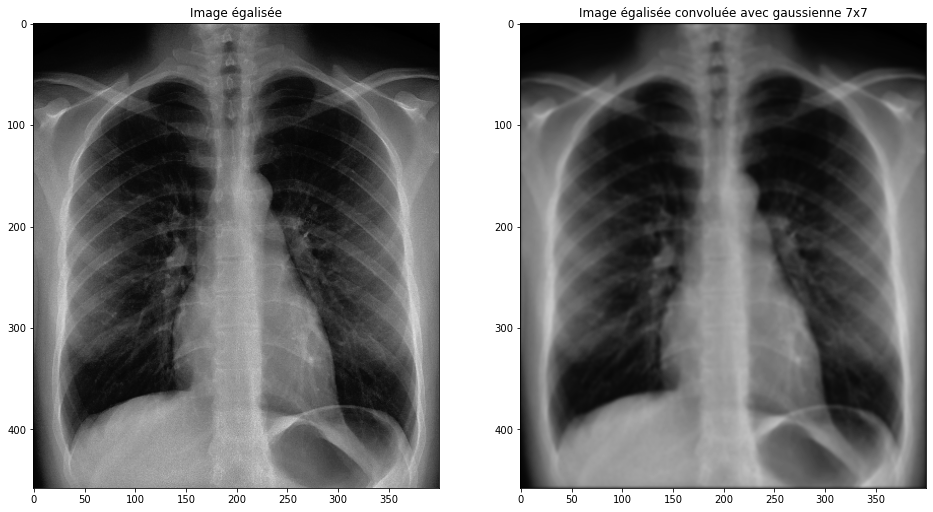

In [11]:
# On vous donne le masque de convolution:
Wgaussienne7 = np.array([[ 1, 4, 7,10, 7, 4, 1],
                         [ 4,12,26,33,26,12, 4],
                         [ 7,26,55,71,55,26, 7],
                         [10,33,71,91,71,33,10],
                         [ 7,26,55,71,55,26, 7],
                         [ 4,12,26,33,26,12, 4],
                         [ 1, 4, 7,10, 7, 4, 1]]) / 1115


img_convol_2 = convolve(img_egalisee, Wgaussienne7, mode='constant', cval=0.0)

plt.figure(figsize=(16,12))

plt.subplot(1,2,1)
plt.imshow(img_egalisee, cmap='gray', vmin=0, vmax=1)
plt.title('Image égalisée')

plt.subplot(1,2,2)
plt.imshow(img_convol_2, cmap='gray', vmin=0, vmax=1)
plt.title('Image égalisée convoluée avec gaussienne 7x7')


Réponse : On observe que l'image convoluée avec un filtre gaussien de plus grand écart-type, et donc de plus grande taille, est plus floue. On perd de plus en plus les détails en hautes fréquences. Les filtres gaussiens sont des filtres passe-bas. 

**6a.** Calculez et affichez le Laplacien de l'image égalisée en la convoluant avec:

$$ W_\text{Laplacien} = 
\begin{bmatrix} 
 -1 & -1 & -1 \\
 -1 & 8 & -1 \\
 -1 & -1 & -1 \\
\end{bmatrix} $$

_(Attention: le laplacien d'une image contient des valeurs négatives, pour les visualiser correctement les bornes d'affichages doivent être -1 et 1!)_

**6b.** Quel est le type de ce filtre?

Text(0.5, 1.0, 'Image égalisée convoluée avec laplacien 3x3')

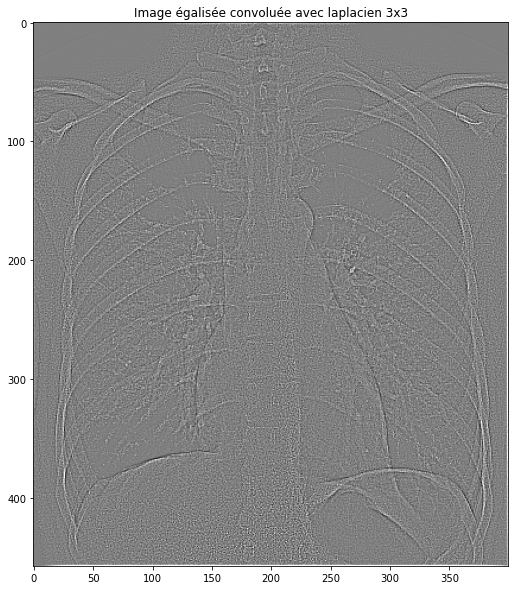

In [31]:
Wlaplacien = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

img_convol_3 = convolve(img_egalisee, Wlaplacien, mode='constant', cval=0.0)
plt.imshow(img_convol_3, cmap='gray', vmin=-1, vmax=1)
plt.title('Image égalisée convoluée avec laplacien 3x3')


Réponse : Le filtre laplacien est un filtre passe-haut. 

**7.** On rappelle que le filtrage high-boost est défini par:  
$$ I_{g} =  I * W_{gaussienne3} $$
$$ I_{HighBoost} = I + k \times (I_g * W_{laplacien}) $$
avec $I$ l'image originale, $I_{HighBoost}$ l'image filtrée, et où $I* W_{gaussienne3}$ est la convolution entre l'image et le masque gaussien de taille 3.

**7a.** Implémentez la function ```high_boost(img, k)``` qui prend en paramètre $I$ et $k$ et renvoie l'image après le filtrage High Boost. Calculez et affichez le résultat pour $k=0$, $k=1$ et $k=2$.

_(Limitez l'affichage entre 0 et 1)_

**7b.** Discutez de l'impact du facteur $k$ sur la lisibilité de l'image (et donc la qualité du réhaussement).

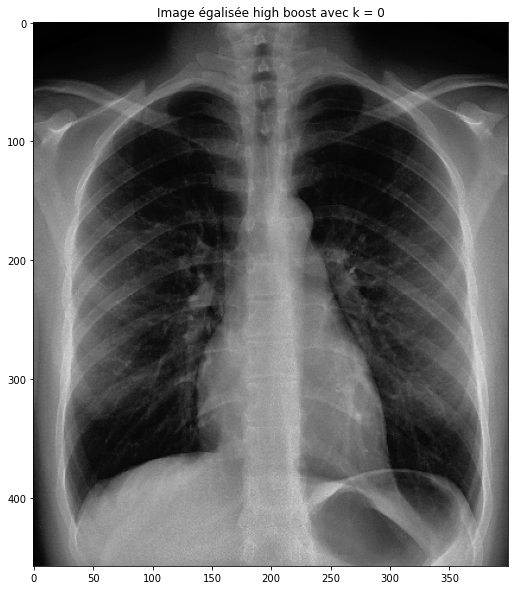

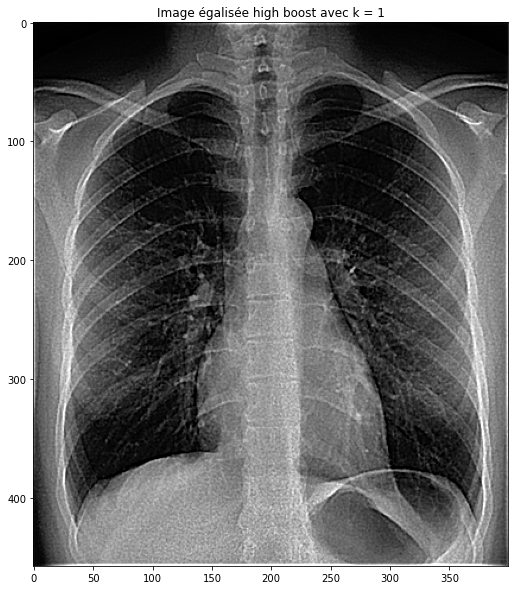

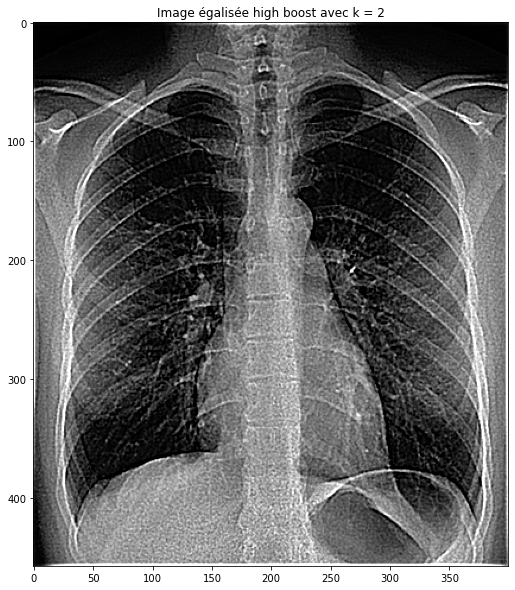

<Figure size 864x720 with 0 Axes>

In [33]:
def high_boost(img, k):
    Wgaussienne_3 = 1/16*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
    I_g = convolve(img, Wgaussienne_3, mode='constant', cval=0.0)
    
    Wlaplacien = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
    I_lap = convolve(I_g, Wlaplacien, mode='constant', cval=0.0)
    
    I_hb = img + k*I_lap 
    
    return I_hb

for k in range(3):
    plt.figure()
    img_hb = high_boost(img_egalisee, k)
    plt.imshow(img_hb, cmap='gray', vmin=0, vmax=1) 
    plt.title("Image égalisée high boost avec k = %i" %k)

plt.figure()
Wlaplacien = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
I_lap = convolve(img_egalisee, Wlaplacien, mode='constant', cval=0.0)
 

Réponse : Plus k est grand, plus les contours deviennent apparents et facilement identifiables. La lisibilité de l'image est donc augmentée en ce sens. Cependant, un certain bruit est aussi introduit. Si notre but est de bien disinguer les contours des différents os, alors le rehaussement est tout de même de bonne qualité. 

**7c.** Dans ce filtrage, pourquoi calculer le laplacien sur $I_g$ plutôt que sur $I$ directement?  

_(Appuyez-vous sur vos observations de la question 6b.)_

Réponse : Le filtre laplacien passe-haut est sensible au bruit, et rehausse le bruit aussi. En appliquant un filtre passe-bas gaussien avant, on peut lisser l'image et enlever du bruit de hautes fréquences. Ainsi, lorsqu'on applique le filtre laplacien par la suite, on peut rehausser les contours et détails de l'image sans rehausser le bruit. 
Cela permet un meilleur high-boost au final. 


# Exercice II : Filtres médians et morphologiques

Cet exercice met en oeuvre des filtrages médians et morphologiques qui sont implémentés dans les modules pythons:   
```skimage.morphology``` et ```skimage.filters``` importé sous les noms: ```skmorph``` et ```skfilters```.

Si les ```import``` ci-dessous déclenchent une erreur, vous devez probablement installer ces modules en executant dans votre ligne de commande conda:

    conda activate tpGBM  
    conda install scikit-image

In [34]:
import skimage.filters as skfilters
import skimage.morphology as skmorph

**1a.** Chargez (sans conversion en intensités entières) et affichez l'image ```fundus.png```.

**1b.** Quel est le nom du bruit qui détériore cette image de la rétine?

Text(0.5, 1.0, 'fundus.png')

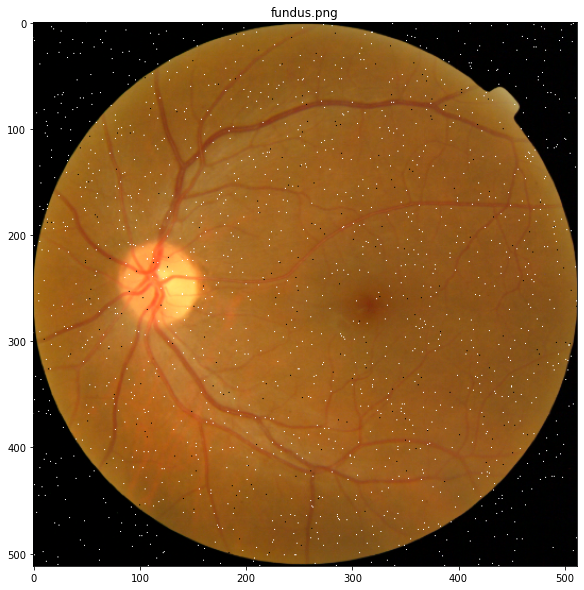

In [35]:
img_fundus = plt.imread('fundus.png')

plt.imshow(img_fundus) 
plt.title("fundus.png")

Réponse : Bruit sel et poivre. Il y a des points à intensité très élevée et des points à intensité très faible, et pas d'entre deux. 

Pour la suite de l'exercice nous ne nous intéresserons qu'au canal vert de l'image (les trois canneaux de l'image sont dans l'ordre: Rouge - Vert - Bleu).


**2a.** Filtrez le bruit identifié à la question précédente à l'aide d'un filtrage médian [skfilters.median](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median) avec pour élément structurant un disque de rayon 2 (voir [skmorph.disk](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk)). Affichez côte à côte le canal vert de l'image avant et après le filtrage.

**2b.** Le filtrage gaussien présenté dans l'exercice I aurait-il été un meilleur ou moins bon choix pour cette tâche?

Text(0.5, 1.0, 'Image filtre median')

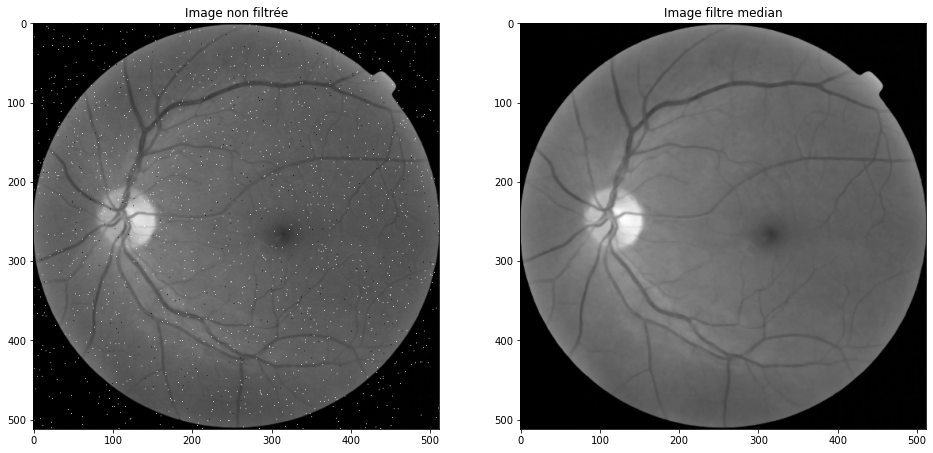

In [16]:
canal_vert = img_fundus[:,:,1]
disque_r2 = skmorph.disk(2)

canal_vert_filtre_median = skfilters.median(canal_vert, disque_r2)

plt.figure(figsize=(16, 12))

plt.subplot(1,2,1)
plt.imshow(canal_vert, cmap='gray') 
plt.title('Image non filtrée')

plt.subplot(1,2,2)
plt.imshow(canal_vert_filtre_median, cmap='gray')
plt.title('Image filtre median')


Text(0.5, 1.0, 'Image filtre gaussien 3x3')

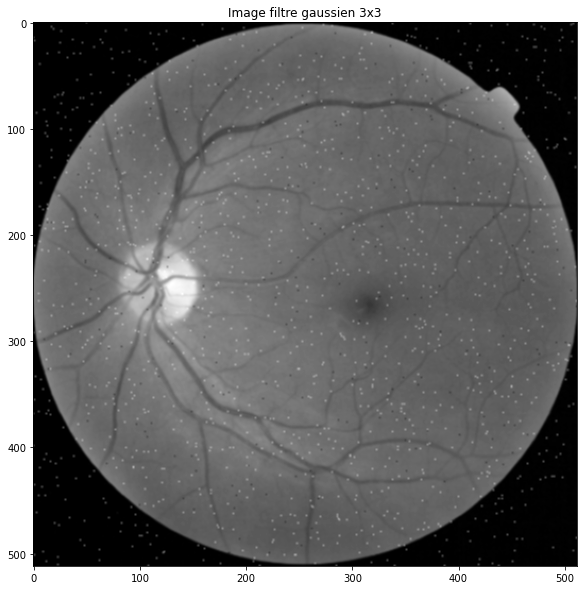

In [17]:
canal_vert_filtre_gauss = convolve(canal_vert, Wgaussienne_3, mode='constant', cval=0.0)
plt.figure()
plt.imshow(canal_vert_filtre_gauss, cmap='gray')
plt.title('Image filtre gaussien 3x3')


Réponse : Comme on peut le constater avec l'image filtrée par un gaussien 3x3, le filtre gaussien est un moins bon choix. Le bruit est encore présent. Augmenter davantage la taille du filtre causerait la perte de détails de hautes fréquences. Le filtre gaussien n'est pas adapté au bruit poivre et sel. 

Les traitements présentés dans les deux sections suivantes seront appliqués sur **la version filtrée du canal vert** de l'image notée $I_V$.

## Rehaussement des vaisseaux

Afin de simplifier la détection des vaisseaux sur les images de la rétine, un prétraitement très utilisé consiste à effectuer une correction d'illumination locale. En définissant $F_{m}$ un filtre médian avec un large élément structurant (un disque de rayon 12), l'image prétraitée $I_P$ est calculée par: $I_P = I_V - F_m(I_V)$.

**3a.** Calculez et affichez le résultat du filtrage médian $F_{m}(I_V)$ et du prétraitement $I_P$. Cette correction d'illumination est-elle efficace?

**3b.** Les vaisseaux sont-ils un contenu hautes ou basses fréquences spatiales? Même question pour le résultat du filtrage médian $F_{m}(I_V)$.

Text(0.5, 1.0, 'Image prétraitée')

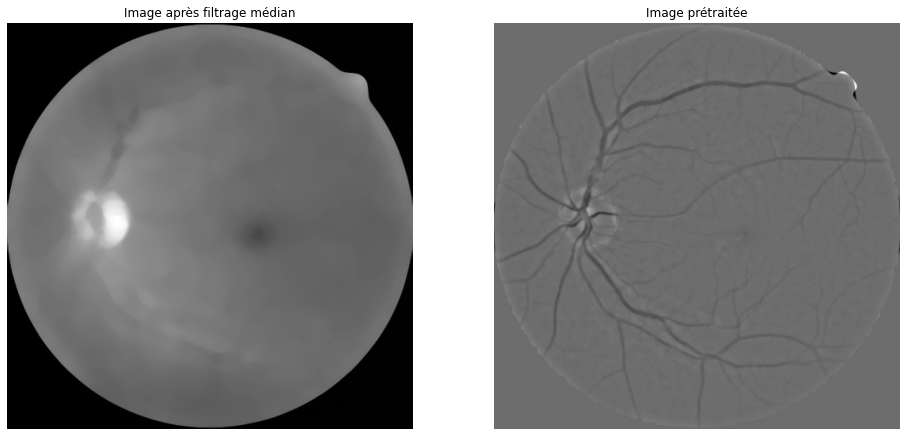

In [18]:
disque_r12 = skmorph.disk(12)
Iv = canal_vert_filtre_median.copy()

Fm = skfilters.median(Iv, disque_r12)
Ip = Iv - Fm

plt.figure(figsize=(16, 12))
plt.subplot(1,2,1)
plt.imshow(Fm, cmap='gray')
plt.axis('off')
plt.title('Image après filtrage médian')

plt.subplot(1,2,2)
plt.imshow(Ip, cmap='gray')
plt.axis('off')
plt.title('Image prétraitée')


Réponse 3a : Oui, la correction d'illumination est efficace. Elle garde les détails tels les vaisseaux sanguins, tout en uniformisant l'intensité du fond. 

Réponse 3b : Les vaisseaux sont des éléments de hautes fréquences spatiales. Le résultat du filtrage médian est de basses fréquences. 

## Segmentation du disque optique

On se propose de segmenter le disque optique (la tête du nerf optique apparaît en clair sur l'image et les vaisseaux en émergent) avec un seuil et des opérations morphologiques.

**4a.** Implémentez la fonction ```binariser(img, seuil)``` qui prend en paramètre une image et un seuil et qui renvoie l'image binarisée: où tous les pixels inférieurs au seuil valent $0$ et tous ceux supérieurs au seuil valent $1$.

**4b.** Calculez et affichez l'image $I_V$ binarisée avec un seuil de $0.6$.

Text(0.5, 1.0, 'Iv binarisée avec seuil de 0.6')

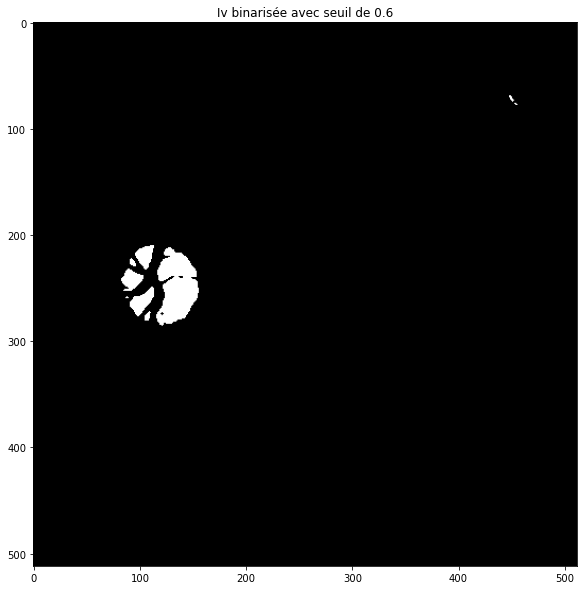

In [19]:
def binariser(img, seuil):
    # Définir un masque (dtype = bool) qui correspond à tous les pixels dans l'image qui sont au dessus du seuil
    img_binarisee = img > seuil
    # Transformer le masque en matrice de type uint8 (0 et 1)
    img_binarisee_int8 = img_binarisee.astype('uint8')
    
    return img_binarisee_int8

seuil = 0.6
Iv_binarisee = binariser(Iv, seuil)
plt.figure(figsize=(10,10))
plt.imshow(Iv_binarisee, cmap='gray')
plt.title('Iv binarisée avec seuil de 0.6')

Vous devriez constater deux erreurs:
1. Les vaisseaux émergeant du disque optique forment des trous dans sa segmentation.
2. Un artefact est détecté à tort dans le coin supérieur droit de l'image. 
 
On va corriger ces deux erreurs avec une ouverture et une fermeture (voir [skmorph.binary_opening](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_opening) et [skmorph.binary_closing](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_closing))

**5a.** Refermez les trous causés par les vaisseaux à l'aide de l'opération morphologique adéquate. Vous devrez choisir un élément structurant adapté. 

**5b.** Effacez l'artefact supérieur droit sans altérer la segmentation du disque avec l'autre opération morphlogique. Une fois encore, choisissez un élément structurant adapté.

Text(0.5, 1.0, 'Iv binarisée après fermeture, carré coté 13')

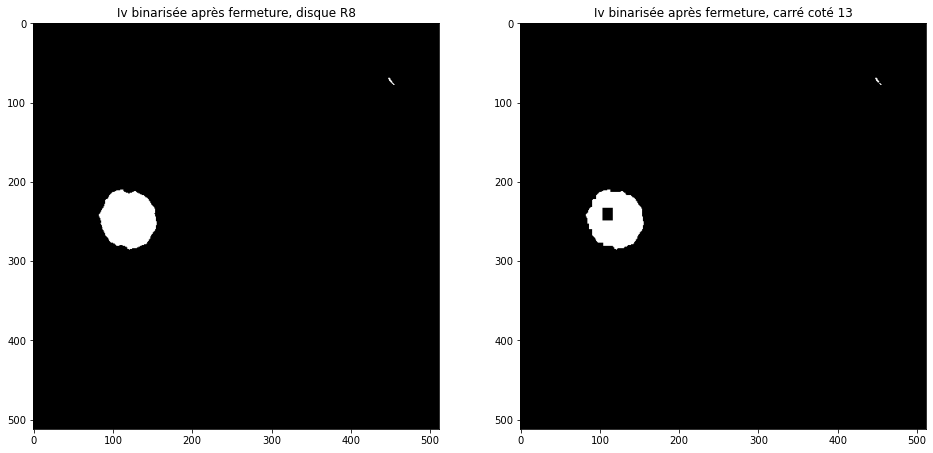

In [21]:
# 5a) Refermer les trous avec fermeture 

rayon_fermeture = 8
elem_fermeture = skmorph.disk(rayon_fermeture)
Iv_binarisee_fermeture = skmorph.binary_closing(Iv_binarisee, elem_fermeture)

elem_carre = skmorph.square(13)
Iv_binarisee_fermeture2 = skmorph.binary_closing(Iv_binarisee, elem_carre)

plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.imshow(Iv_binarisee_fermeture, cmap='gray')
plt.title('Iv binarisée après fermeture, disque R8')

plt.subplot(1,2,2)
plt.imshow(Iv_binarisee_fermeture2, cmap='gray')
plt.title('Iv binarisée après fermeture, carré coté 13')


Réponse 5a : Après comparaison avec différents éléments structurants, on choisit un disque de rayon 8. Premièrement, c'est à partir de cet entier (la fonction skmorph.disk prend seulement un int comme rayon) qu'il n'y a plus de trous. Deuxièmement, le disque est privilégié car ça prend un element structurant plus petit pour refermer les trous (comparativement à carré, par ex.) et il cause moins effet escalier sur les bords


Text(0.5, 1.0, 'Iv binarisée après fermeture et ouverture')

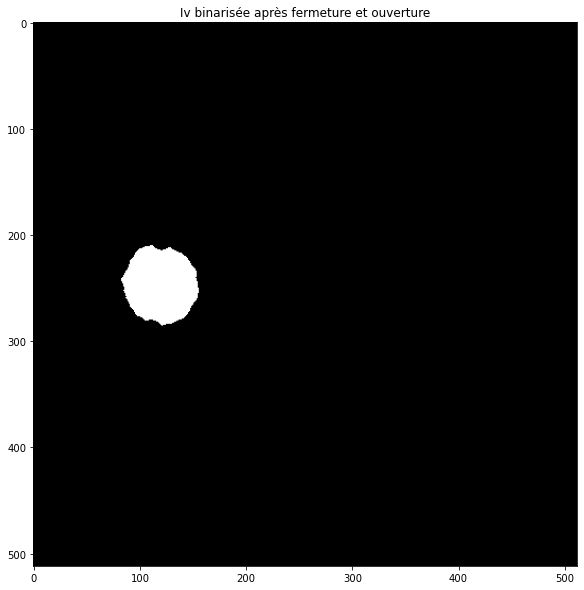

In [25]:
# 5b) Enlever artefact avec ouverture

rayon_ouverture = 2
elem_ouverture = skmorph.disk(rayon_ouverture)
Iv_binarisee_ouverture = skmorph.binary_opening(Iv_binarisee_fermeture, elem_ouverture)

plt.figure(figsize=(10,10))
plt.imshow(Iv_binarisee_ouverture, cmap='gray')
plt.title('Iv binarisée après fermeture et ouverture')


Réponse 5b : On choisit comme élément structurant un disque de rayon 2, car c'est à partir de cet entier (la fonction skmorph.disk prend seulement un int pour le rayon) qu'il n'y a plus d'artefact dans le coin supérieur droit. 



On souhaite faire une estimation rapide du rayon et du centre du disque optique tel qu'il a été segmenté aux questions précédentes.

**6.** En effectuant des érosions successives de la segmentation par des disques de rayon 1,2,3... jusqu'à ce que la segmentation disparaisse, déterminez le rayon et la position du centre du disque optique.

Le rayon du disque est environ 33
La position du centre du disque est à environ y =  [247] et x =  [119]


Text(0.5, 1.0, 'Le centre estimé du disque')

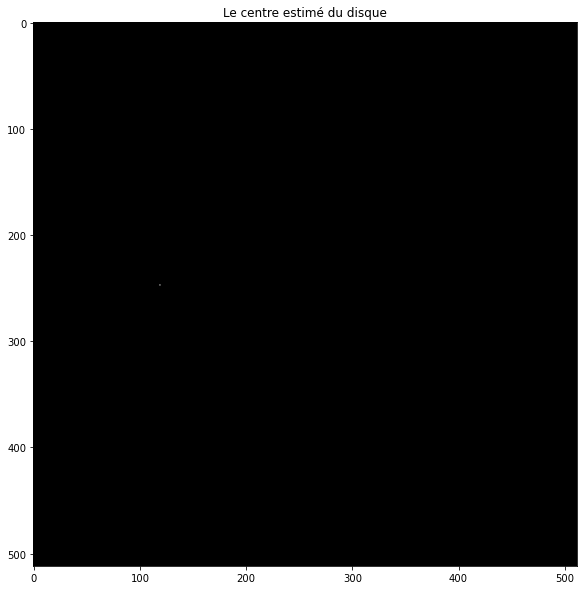

In [36]:
# Astuce: np.any(I) renvoie Faux si tous les pixels de I valent 0
#         y, x = np.where(I) renvoie les coordonées des pixels différents de 0 de I. 

rayon_erosion = 0

img_erodee = Iv_binarisee_ouverture.copy()

n = 1
while n > 0: # Créer une boucle infinie
    elem_erosion = skmorph.disk(rayon_erosion)
    img_erodee = skmorph.binary_erosion(Iv_binarisee_ouverture, elem_erosion)
    if np.any(img_erodee) == False:
        # Retrouver la valeur du rayon juste avant qu'il n'ait plus de point restant dans l'image
        rayon_erosion = rayon_erosion-1
        elem_erosion = skmorph.disk(rayon_erosion)
        img_erodee = skmorph.binary_erosion(Iv_binarisee_ouverture, elem_erosion)
        break     
    rayon_erosion += 1

print('Le rayon du disque est environ', rayon_erosion)
y, x = np.where(img_erodee)
print('La position du centre du disque est à environ y = ', y, 'et x = ', x)
plt.figure()
plt.imshow(img_erodee, cmap='gray')
plt.title('Le centre estimé du disque')
